<a href="https://colab.research.google.com/github/simsekergun/Resolution/blob/main/notebooks/Resolution_Example_FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from google.colab import files

In [2]:
# Multilayer Perceptron
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import concatenate
from tensorflow.keras import optimizers
from tensorflow.keras import backend
from keras.layers import LeakyReLU, PReLU
from tensorflow.keras.metrics import categorical_accuracy

In [3]:
df_m = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/datasets/Es_measured.csv',header=None)
df_r = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/datasets/Es_real.csv',header=None)
df_m.shape, df_r.shape

((2330, 110), (2330, 100))

In [4]:
dfm_max = max(df_m.max())
dfr_max = max(df_r.max())
dfm_max, dfr_max

(528.27, 470.16)

In [5]:
X = df_m/dfm_max
y = df_r/dfr_max

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
X_train.shape, X_test.shape, y_train.shape

((1864, 110), (466, 110), (1864, 100))

In [7]:
# ANN parameters
ac = 'relu'  # activation function
nnno = 1024    # number of neurons
dr_rate = 0.2  # dropout rate
EPOCHS = 200    # number of epocs
LR = 0.001     # learning rate
ninput = 110
noutput = 100

In [8]:
visible = Input(shape=(ninput,))
hidden1 = Dense(nnno, activation=ac)(visible)
hidden1 = Dropout(dr_rate)(hidden1)
hidden2 = Dense(nnno, activation=ac)(hidden1)
hidden2 = Dropout(dr_rate)(hidden2)
hidden3 = Dense(nnno, activation=ac)(hidden2)
hidden3 = Dropout(dr_rate)(hidden3)
hidden4 = Dense(nnno, activation=ac)(hidden3)
hidden4 = Dropout(dr_rate)(hidden4)
predicted_value = Dense(noutput)(hidden3)
modelANN = Model(inputs=visible, outputs=predicted_value)

In [9]:
opt = optimizers.Adamax(learning_rate=LR)
modelANN.compile(optimizer=opt, loss=['mse'])
history = modelANN.fit(X_train, y_train,epochs=EPOCHS, validation_data = (X_test,y_test), verbose=1)

Epoch 1/200
59/59 [==============================] - 13s 10ms/step - loss: 0.0158 - val_loss: 0.0124
Epoch 2/200
59/59 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.0112
Epoch 3/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0112 - val_loss: 0.0078
Epoch 4/200
59/59 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 0.0071
Epoch 5/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0079 - val_loss: 0.0065
Epoch 6/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0070 - val_loss: 0.0051
Epoch 7/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.0048
Epoch 8/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 9/200
59/59 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.0043
Epoch 10/200
59/59 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.0044
Epoch 1

In [10]:
y_pred = modelANN.predict(X_test)

15/15 [==============================] - 0s 3ms/step


In [11]:
y_pred = y_pred*dfm_max
y_test = y_test*dfm_max

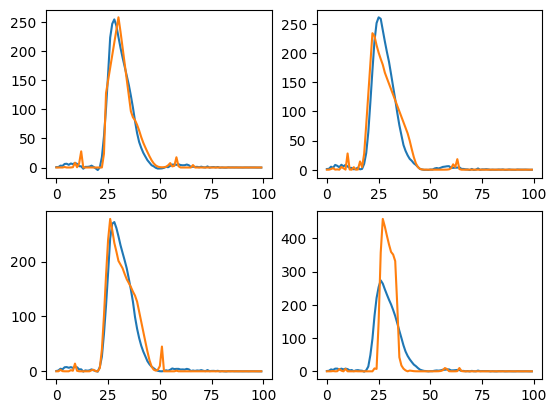

In [12]:
# Plot some results: truth vs prediction
ntest1 = 0 
ntest2 = 100 
ntest3 = 200
ntest4 = 400 
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(y_pred[ntest1,:])
axs[0, 0].plot(y_test.iloc[ntest1,:])
axs[0, 1].plot(y_pred[ntest2,:])
axs[0, 1].plot(y_test.iloc[ntest2,:])
axs[1, 0].plot(y_pred[ntest3,:])
axs[1, 0].plot(y_test.iloc[ntest3,:])
axs[1, 1].plot(y_pred[ntest4,:])
axs[1, 1].plot(y_test.iloc[ntest4,:])

In [13]:
y_test.to_csv('FCNN_ytest.csv')
pd.DataFrame(y_pred).to_csv('FCNN_ypred.csv')
X_test.to_csv('FCNN_inputs.csv')

In [14]:
files.download('FCNN_ytest.csv')
files.download('FCNN_ypred.csv')
files.download('FCNN_inputs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
normalized_mse = mean_squared_error(y_test,y_pred)/dfr_max**2
normalized_mse

0.004771796719919478